##Libraries to be Installed are given below


In [ ]:
!pip install transformers datasets torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

##We are using [https://huggingface.co/datasets/facebook/voxpopuli](https://huggingface.co/datasets/facebook/voxpopuli) Dataset for our Language Identification Dataset.


*   The dataset contains these Languages.
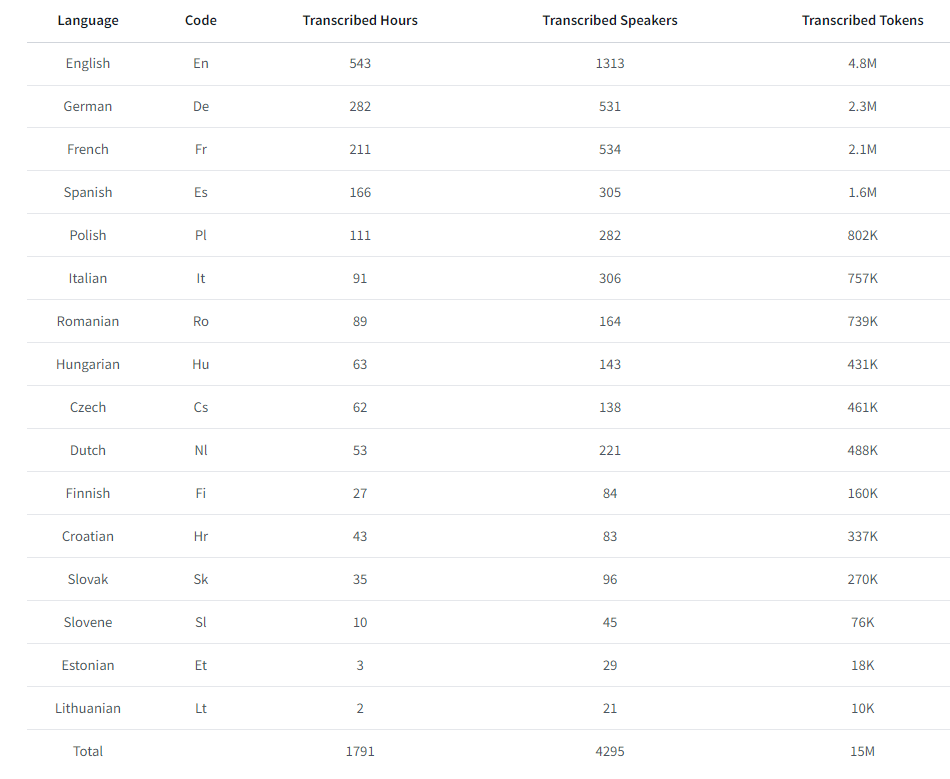

* Data Instance:
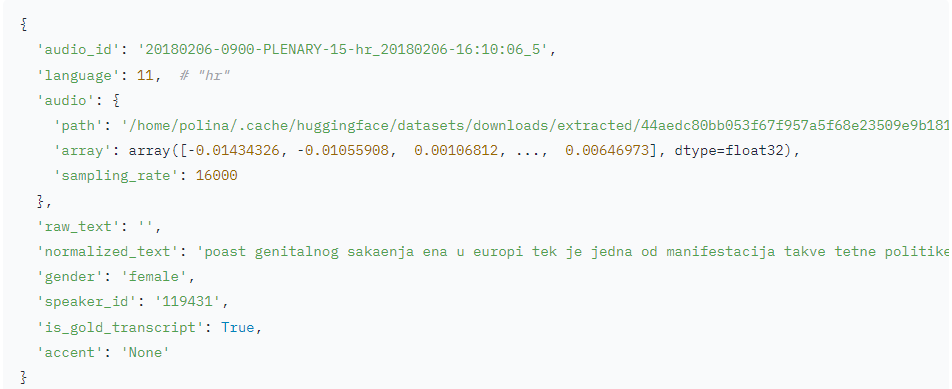



In [ ]:
from datasets import load_dataset

# The first language we will load is english it's language id is 0 in Dataset.
#try to think significance of streaming = True
dataset = load_dataset("facebook/voxpopuli", "en", split='train', streaming=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
#Only taking 200 rows
subset = []
for i, example in enumerate(dataset):
    if i >= 200:
        break
    subset.append(example)

In [ ]:
#spanish data language id 3
dataset_es = load_dataset("facebook/voxpopuli", "es", split='train', streaming=True)

In [ ]:
#appending 200 rows for spanish language data in our existing subset.
for i, example in enumerate(dataset_es):
    if i >= 200:
        break
    subset.append(example)

In [ ]:
#romanian data language id 6
dataset_ro = load_dataset("facebook/voxpopuli", "ro", split='train', streaming=True)


In [ ]:
#appending 200 rows of romanian data to subset consisting of english and spanish data
for i, example in enumerate(dataset_ro):
    if i >= 200:
        break
    subset.append(example)

In [ ]:
len(subset)#3 languages 200 rows each hence 600

600

In [ ]:
subset[0]#first row of dataset

{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17',
 'language': 0,
 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav',
  'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
         -0.00027466, -0.00018311]),
  'sampling_rate': 16000},
 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.',
 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.',
 'gender': 'female',
 'speaker_id': '124737',
 'is_gold_transcript': True,
 'accent': 'None'}

In [ ]:
subset[201]#notice the language changed from 0 to 3 at 201st row

{'audio_id': '20190312-0900-PLENARY-es_20190312-21:11:32_5',
 'language': 3,
 'audio': {'path': 'train_part_0/20190312-0900-PLENARY-es_20190312-21:11:32_5.wav',
  'array': array([ 3.35693359e-04,  9.15527344e-05,  1.52587891e-04, ...,
         -4.33349609e-03, -1.05590820e-02,  1.66320801e-02]),
  'sampling_rate': 16000},
 'raw_text': 'Si bien esta lista no es perfecta, sí que resulta necesario que las entidades financieras refuercen sus controles.',
 'normalized_text': 'si bien esta lista no es perfecta sí que resulta necesario que las entidades financieras refuercen sus controles.',
 'gender': 'male',
 'speaker_id': '28397',
 'is_gold_transcript': True,
 'accent': 'None'}

In [ ]:
import random
random.shuffle(subset)#shuffling the dataset

In [ ]:
#loading wav2vec model to extract features from audio files.
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from tqdm import tqdm
# Load the Wav2Vec2 processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
call_count=0
def extract_wav2vec_features(batch):
    global call_count
    call_count+=1
    print(call_count)
    inputs = processor(batch["audio"]["array"], sampling_rate=16000, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return {"features": outputs.last_hidden_state.squeeze().mean(dim=0).numpy(), "label": batch["language"]}




preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Extract Wav2Vec features for the subset
#as 600 audio files until the number reaches 600 keep this cell running
#this is a bit time consuming almost around 20 mins
subset_with_features = [extract_wav2vec_features(example) for example in subset]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:

from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(subset_with_features, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.1)

# Extract features and labels
def prepare_data(data):
    features = [item["features"] for item in data]
    labels = [item["label"] for item in data]
    return torch.tensor(features), torch.tensor(labels)


train_features, train_labels = prepare_data(train_data)
val_features, val_labels = prepare_data(val_data)
test_features, test_labels = prepare_data(test_data)



<ipython-input-18-998754fa5f34>:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.tensor(features), torch.tensor(labels)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256 * (input_length // 4), 128)  # Adjust the input dimension to the linear layer
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool1d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Assuming train_features and val_features are already loaded
# And they have the shape [batch_size, sequence_length]
input_length = train_features.shape[1]  # Add this line to get the sequence length

# Assuming we have 3 languages in the dataset, and the original labels are 6, 0, and 3
label_mapping = {6: 0, 0: 1, 3: 2}

# Apply the label mapping
train_labels = train_labels.apply_(lambda x: label_mapping[x])
val_labels = val_labels.apply_(lambda x: label_mapping[x])
test_labels = test_labels.apply_(lambda x: label_mapping[x])

# Verify the mapping
unique_train_labels = torch.unique(train_labels)
unique_val_labels = torch.unique(val_labels)
unique_test_labels = torch.unique(test_labels)
print(f"Mapped unique train labels: {unique_train_labels}")
print(f"Mapped unique validation labels: {unique_val_labels}")
print(f"Mapped unique test labels: {unique_test_labels}")

# Initialize the model
model = CNNModel(input_dim=1, num_classes=3)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_features.unsqueeze(1).float())
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_features.unsqueeze(1).float())
        val_loss = criterion(val_outputs, val_labels)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")


Mapped unique train labels: tensor([0, 1, 2])
Mapped unique validation labels: tensor([0, 1, 2])
Mapped unique test labels: tensor([0, 1, 2])
Epoch 1/20, Loss: 1.0976513624191284, Val Loss: 1.427781581878662
Epoch 2/20, Loss: 1.6176064014434814, Val Loss: 1.2506154775619507
Epoch 3/20, Loss: 1.2856043577194214, Val Loss: 1.1307376623153687
Epoch 4/20, Loss: 1.1003422737121582, Val Loss: 1.078477144241333
Epoch 5/20, Loss: 1.0579777956008911, Val Loss: 1.0207769870758057
Epoch 6/20, Loss: 1.0277124643325806, Val Loss: 0.9809108376502991
Epoch 7/20, Loss: 1.0109766721725464, Val Loss: 0.9366990923881531
Epoch 8/20, Loss: 0.9847489595413208, Val Loss: 0.8877346515655518
Epoch 9/20, Loss: 0.9363442063331604, Val Loss: 0.8368819355964661
Epoch 10/20, Loss: 0.8692710995674133, Val Loss: 0.7888597846031189
Epoch 11/20, Loss: 0.8235396146774292, Val Loss: 0.7308104634284973
Epoch 12/20, Loss: 0.7665299773216248, Val Loss: 0.6868386268615723
Epoch 13/20, Loss: 0.7121451497077942, Val Loss: 0.62

In [ ]:
import torch
from sklearn.metrics import accuracy_score

# Ensure your model is in evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Forward pass to get predictions
    test_outputs = model(test_features.unsqueeze(1).float())


    # Get the predicted class labels
    _, predicted = torch.max(test_outputs, 1)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels.numpy(), predicted.numpy())

# Print the test accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 60.83%
